# Data Visualization: Ford GoBike Data Exploration 

## Table of Contents
<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#eda">Univariate Exploration</a></li> 
<li><a href="#eda">Bivariate Exploration</a></li>
<li><a href="#eda">Multivariate Exploration</a></li>
</ul>

## Preliminary Wrangling
In this step we will import libraries wich will help us in our analysis and explore a dataset containig information about individual rides made in a bike-sharing system.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [10]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [11]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [12]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

- There are Null values in `member_birth_year` and `member_gender`, which accounts for about 5% of the data and can be removed. Also, the gender has some unspecified value called 'other', which accounts for about 1.5% of the data and can be removed too.

In [13]:
df.dropna(inplace=True)

In [14]:
df = df[(df.member_gender!='Other')]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171305 non-null  int64         
 1   start_time               171305 non-null  datetime64[ns]
 2   end_time                 171305 non-null  datetime64[ns]
 3   start_station_id         171305 non-null  float64       
 4   start_station_name       171305 non-null  object        
 5   start_station_latitude   171305 non-null  float64       
 6   start_station_longitude  171305 non-null  float64       
 7   end_station_id           171305 non-null  float64       
 8   end_station_name         171305 non-null  object        
 9   end_station_latitude     171305 non-null  float64       
 10  end_station_longitude    171305 non-null  float64       
 11  bike_id                  171305 non-null  int64         
 12  user_type       

In [16]:
df.nunique()

duration_sec                 4341
start_time                 171294
end_time                   171293
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4603
user_type                       2
member_birth_year              72
member_gender                   2
bike_share_for_all_trip         2
dtype: int64

- The `member_birth_year` has an unreasonable value for a minimum of 1878, we need to check for values to remove. I will let maximum age=99 years, so minimum birth year=2019-99=1920

In [17]:
[x for x in df.member_birth_year.unique() if x<1930]

[1900.0, 1920.0, 1878.0, 1901.0, 1902.0, 1927.0]

In [18]:
df = df[(df.member_birth_year >1919)]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171234 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171234 non-null  int64         
 1   start_time               171234 non-null  datetime64[ns]
 2   end_time                 171234 non-null  datetime64[ns]
 3   start_station_id         171234 non-null  float64       
 4   start_station_name       171234 non-null  object        
 5   start_station_latitude   171234 non-null  float64       
 6   start_station_longitude  171234 non-null  float64       
 7   end_station_id           171234 non-null  float64       
 8   end_station_name         171234 non-null  object        
 9   end_station_latitude     171234 non-null  float64       
 10  end_station_longitude    171234 non-null  float64       
 11  bike_id                  171234 non-null  int64         
 12  user_type       

In [20]:
df.duplicated().sum()

0

- I will create new column for age from `member_birth_year`, and new columns for hour of the day, day of the month and weekday from `start_time`.

In [21]:
df['age']=(2019-df['member_birth_year']).astype(int)

In [22]:
df.age.describe()

count    171234.000000
mean         34.125507
std           9.969689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: age, dtype: float64

In [23]:
df['hour']=df.start_time.dt.hour
df['day']=df.start_time.dt.day
df['weekday']=df.start_time.dt.day_name()

In [24]:
df.user_type.value_counts()

Subscriber    155123
Customer       16111
Name: user_type, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171234 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171234 non-null  int64         
 1   start_time               171234 non-null  datetime64[ns]
 2   end_time                 171234 non-null  datetime64[ns]
 3   start_station_id         171234 non-null  float64       
 4   start_station_name       171234 non-null  object        
 5   start_station_latitude   171234 non-null  float64       
 6   start_station_longitude  171234 non-null  float64       
 7   end_station_id           171234 non-null  float64       
 8   end_station_name         171234 non-null  object        
 9   end_station_latitude     171234 non-null  float64       
 10  end_station_longitude    171234 non-null  float64       
 11  bike_id                  171234 non-null  int64         
 12  user_type       

##### **Structure of the dataset:**
> The data originally had 183412 entries with 16 features. Null values and irresonable data were removed and new features were added to have an updated 171234 entries in the dataset with 20 features; some are numerical and some are categorical and 2 are datetime. The data represents the rides during February of 2019.

##### **Main feature(s) of interest in the dataset:**
> The average duration of a trip and how it is affected by the other features. Also, we need to describe when most trips are taken.

##### **Feature(s) in the dataset that I think will help support the investigation into the feature(s) of interest:**
> I think hour of the day, day of the week, age, gender, a user being a subscriber, and a user being a member of `bike_share_for_all_trip` will affect how the main features will behave.

## Univariate Exploration
 We will start by looking at the distribution of ride duration:

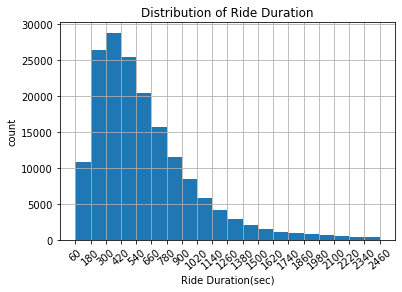

In [26]:
bins=np.arange(60,2500,120)
tick_names=['{}'.format(v) for v in bins]
df.duration_sec.hist(bins=bins)
#plt.hist(df.duration_sec,bins=bins)
plt.xticks(bins,bins,rotation=40);
plt.xlabel('Ride Duration(sec)')
plt.ylabel('count')
plt.title('Distribution of Ride Duration');
#plt.xlim(0,600)

- The distribution exhibit a long tail which suggests that we try a log transformation.

In [27]:
np.log10(df.duration_sec.describe())

count    5.233590
mean     2.843716
std      3.197983
min      1.785330
25%      2.508193
50%      2.706718
75%      2.895975
max      4.927103
Name: duration_sec, dtype: float64

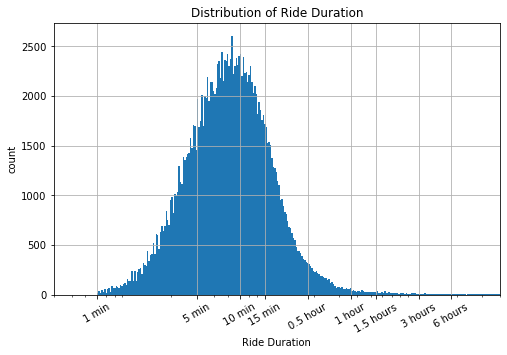

In [28]:
plt.figure(figsize=(8,5))
bins=10**np.arange(1.5,5,.01)
df.duration_sec.hist(bins=bins)
plt.xscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.xticks(tick_locs, tick_names,rotation=30);
plt.xlabel('Ride Duration')
plt.ylabel('count')
plt.title('Distribution of Ride Duration');
plt.xlim(30,40000);
#plt.ylim(0,150);

- The log transformed distribution have a high similarity to a normal distribution. We can clearly see that most of the rides range between 5 and 15 minutes, with a mean of about 10 minutes. We will check the same distribution as a box plot.

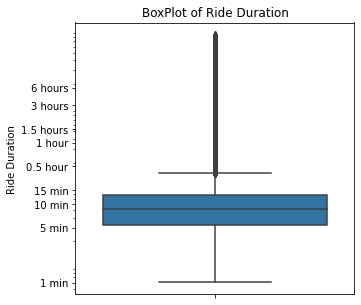

In [29]:
plt.figure(figsize=(5,5))
sb.boxplot( y=df['duration_sec'])
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.ylabel('Ride Duration')
plt.title('BoxPlot of Ride Duration');
plt.yticks(tick_locs, tick_names);

- Next we will check the distribution of age.

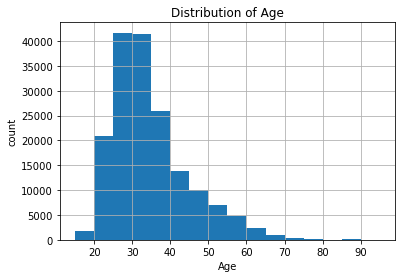

In [30]:
bins=np.arange(15,100,5)
tick_names=['{}'.format(v) for v in bins]
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age');
df.age.hist(bins=bins);

- The distribution is skewed to the right, but it doesnt seem like a long tail. We will try a log transformation again.

In [31]:
np.log10(df.age.describe())

count    5.233590
mean     1.533079
std      0.998682
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      1.995635
Name: age, dtype: float64

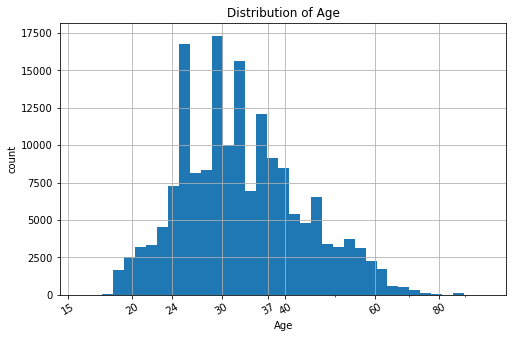

In [33]:
plt.figure(figsize=(8,5))
bins=10**np.arange(1.2,2,.0215)
df.age.hist(bins=bins)
plt.xscale('log')
tick_locs = [15,20,24,30,37,40,60,80]
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age');
plt.xticks(tick_locs, tick_locs,rotation=30);

- The distribution is not uniform, it has some resemblance to a normal distribution, we can see that most of the ages lie between 24 and 40 years with mean around 30 years. There is still some tail. We can try a square root transform.

In [32]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

In [33]:
df.age.describe().apply(sqrt_trans)

count    413.804302
mean       5.841704
std        3.157481
min        4.242641
25%        5.196152
50%        5.656854
75%        6.244998
max        9.949874
Name: age, dtype: float64

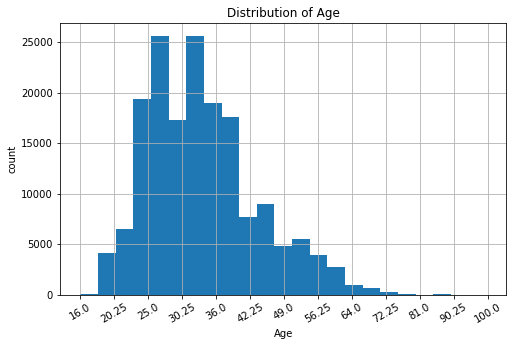

In [34]:
plt.figure(figsize=(8,5))
bin_edges = np.arange(4, sqrt_trans(df['age'].max())+0.26, 0.26)
df.age.apply(sqrt_trans).hist(bins=bin_edges)
tick_locs = np.arange(4, sqrt_trans(df['age'].max())+0.5, 0.5)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age');
#tick_locs=[15,20,25,30,40,60,80]
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True),rotation=30);
#plt.xticks(tick_locs, tick_locs);

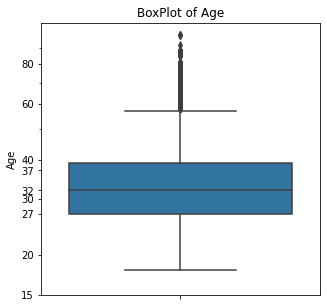

In [35]:
plt.figure(figsize=(5,5))
sb.boxplot( y=df['age'])
plt.yscale('log')
tick_locs = [15,20,27,30,32,37,40,60,80]
plt.ylabel('Age')
plt.title('BoxPlot of Age');
plt.yticks(tick_locs, tick_locs);

- Using a boxplot we can see more acurately that most of the ages lie between about 27 and 40 years with a midean of 32 years.


- Now we will check the distribution of rides across the month days.

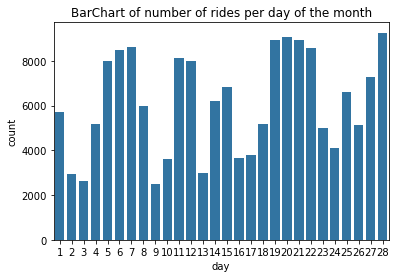

In [36]:
base_color=sb.color_palette()[0]
plt.xlabel('Day of Month')
plt.ylabel('count')
plt.title('BarChart of number of rides per day of the month')
sb.countplot(data=df, x='day',color=base_color);

- There is no specific pattern, we will repeat the distribution using weekdays.

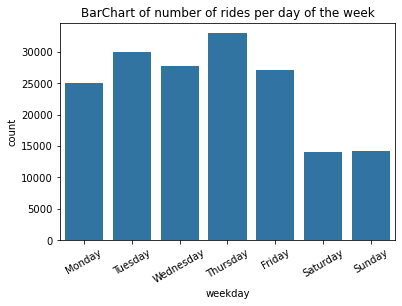

In [37]:
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df, x='weekday',color=base_color,order=order)
plt.title('BarChart of number of rides per day of the week')
plt.xticks(rotation=30);

- We can see that there is a pattern that rides tend to decrease in weekends. This suggests that most of the rides are used to go and from work.


- Next we will check the distribution across the hours of the day.

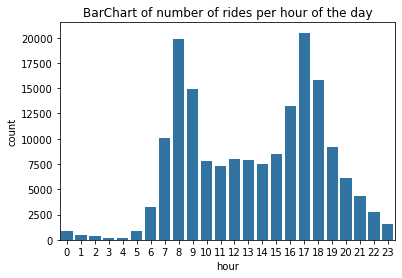

In [38]:
sb.countplot(data=df, x='hour',color=base_color)
plt.title('BarChart of number of rides per hour of the day');

- We can clearly see that the distribution is bimodal, with one peak around 8 am. and another at about 5 pm. which adds more strength to the idea that the rides are mainly used to go to and from work.


- Next we will check the distribution of gender.

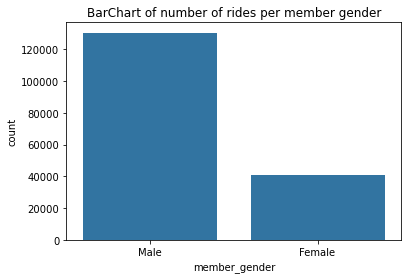

In [39]:
sb.countplot(data=df, x='member_gender',color=base_color)
plt.title('BarChart of number of rides per member gender');

- We can see that there are about 3 times more males than females using the rides.


- Next we will check the distribution of user_type.

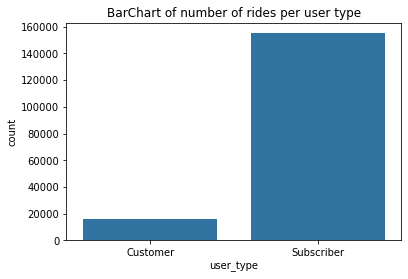

In [40]:
sb.countplot(data=df, x='user_type',color=base_color)
plt.title('BarChart of number of rides per user type');

- We can see that there are about 8 times more subscribers that casual customers.


- Next we will check the distribution of bike_share_for_all_trip.

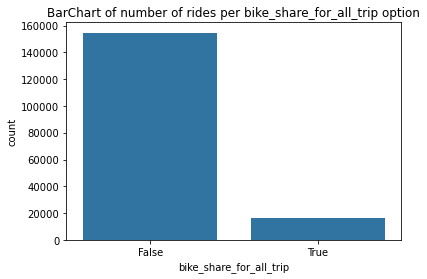

In [41]:
sb.countplot(data=df, x='bike_share_for_all_trip',color=base_color)
plt.title('BarChart of number of rides per bike_share_for_all_trip option');

- We can see that there are about 8 times people not member in this system than people who are members.

#### **Summary:**

##### **The distribution of the variables of interest:**
> The ride duration exhibts a log normal distribution with most of the rides having a duration between 5 and 15 minutes. Most of the rides take place during weekdays with a daily bimodal distribution with peaks at 8am and 5pm suggesting the the rides are used mainly to go to and from work.

##### **The distribution of other variables**
> The other variables have their own distributions without any abnormal behaviour. Age was eventually described via a log transformation with most of the ages between 27 and 40 years.

## **Bivariate Exploration**

First, we will start by investigating the relation between ride duration and week days.

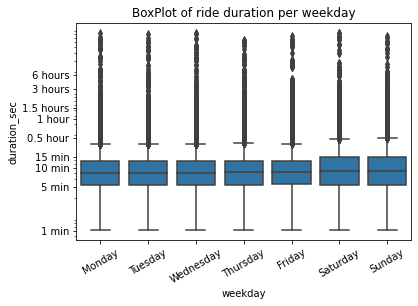

In [42]:
sb.boxplot(x=df['weekday'], y=df['duration_sec'],color=base_color,order=order)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.yticks(tick_locs, tick_names)
plt.title('BoxPlot of ride duration per weekday')
plt.xticks(rotation=30);

- We can see that the duration distribution is some how similar across the weekdays, with a slight more variance in the weekends.


- Next, we will check the relation between ride duration and user type.

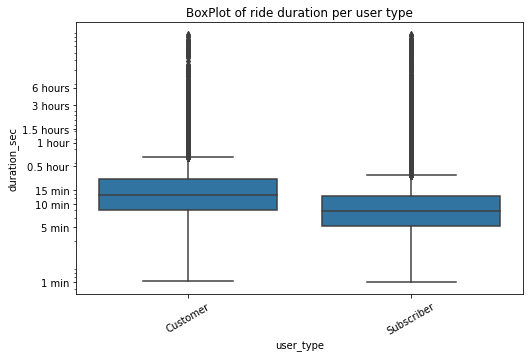

In [43]:
plt.figure(figsize=(8,5))
sb.boxplot(x=df['user_type'], y=df['duration_sec'],color=base_color)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of ride duration per user type');
plt.yticks(tick_locs, tick_names)
plt.xticks(rotation=30);

- We can see that subscribers tend to have less average ride times compared to normal customers. It seems that most of the subscribers are using the system to go to and from work, with the same round trip time every day.


- Next, we will check the relation between ride duration and gender.

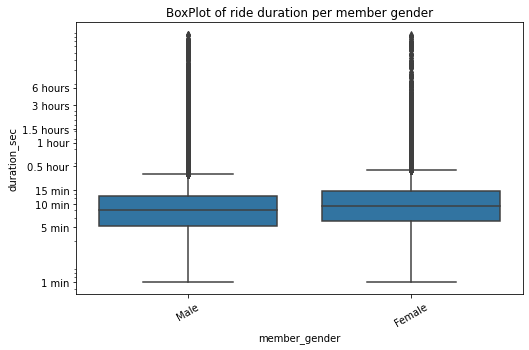

In [44]:
plt.figure(figsize=(8,5))
sb.boxplot(x=df['member_gender'], y=df['duration_sec'],color=base_color)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of ride duration per member gender')
plt.yticks(tick_locs, tick_names)
plt.xticks(rotation=30);

- It seems females tend to have a little bit more average time per ride compared to males.

- Next, we will check the relation between duration time and being a subscriber of `bike_share_for_all_trip`.

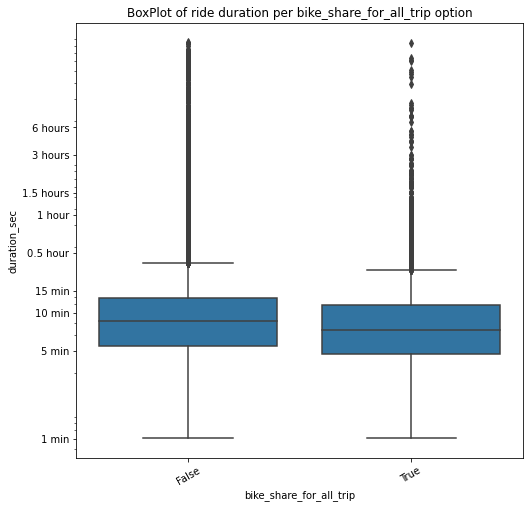

In [45]:
plt.figure(figsize=(8,8))
sb.boxplot(x=df['bike_share_for_all_trip'], y=df['duration_sec'],color=base_color)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of ride duration per bike_share_for_all_trip option')
plt.yticks(tick_locs, tick_names)
plt.xticks(rotation=30);

- It looks like subscribers of this option tend to have less average time per ride compared to non-subscribers.


- Next, we will check the relation between ride duration and hour of the day.

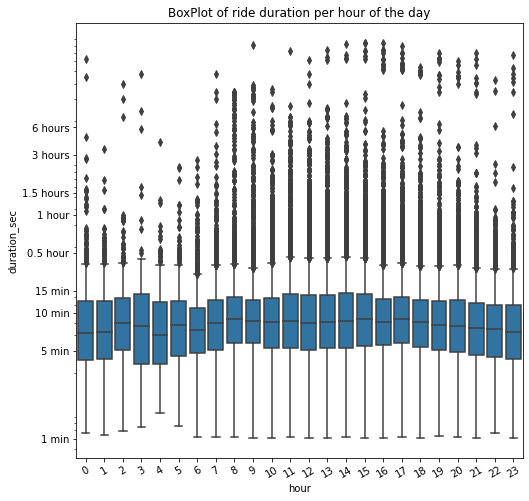

In [46]:
plt.figure(figsize=(8,8))
sb.boxplot(x=df['hour'], y=df['duration_sec'],color=base_color)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of ride duration per hour of the day')
plt.yticks(tick_locs, tick_names)
plt.xticks(rotation=30);

- The ride duration seems consistent across the hours of the day with slight decrease in average duration before and after working hours.


- Next, we will check the ride duration compared to age.

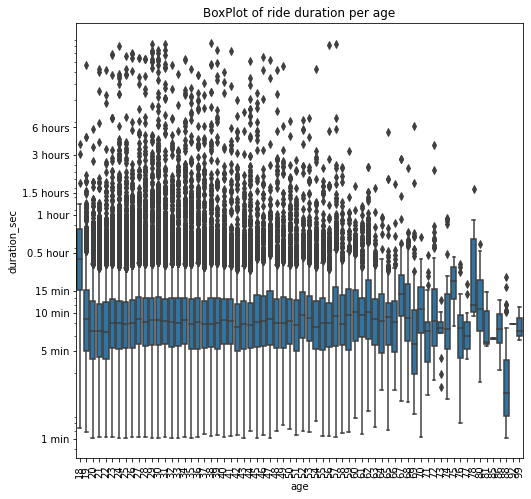

In [47]:
plt.figure(figsize=(8,8))
sb.boxplot(x=df['age'], y=df['duration_sec'],color=base_color)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of ride duration per age')
plt.yticks(tick_locs, tick_names)
plt.xticks(rotation=90);

- We notice that most of the ages have the same distribution. Age 18 seems to have higher ride duration of about half an hour, also ages above 65 seem to have different distributions. This might be understood as that people at that age are probably not working and are not abide by a certain daily routine.


- Next, we will check this relation again but as a scatter plot.

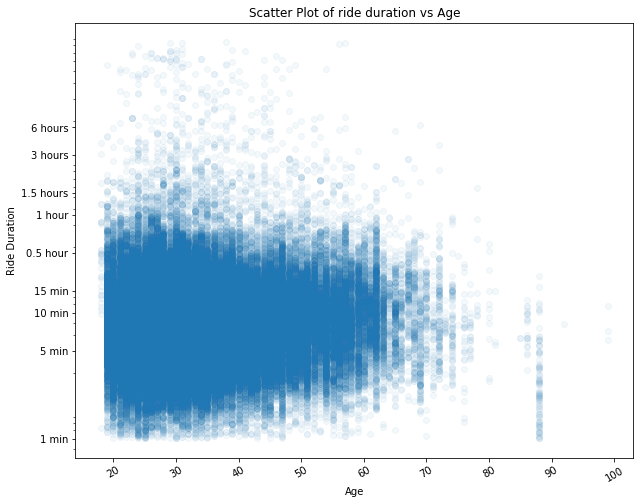

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(data=df ,x='age', y='duration_sec',alpha=1/20)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.yticks(tick_locs, tick_names)
plt.xticks(rotation=30)
plt.xlabel('Age')
plt.ylabel('Ride Duration')
plt.title('Scatter Plot of ride duration vs Age');

- It looks as if the variance in duration in most of the rides is getting smaller with age uptill 65 years. There are not much rides above that age to consider for a behaviour.


- Next, we will check the relation between age and gender.

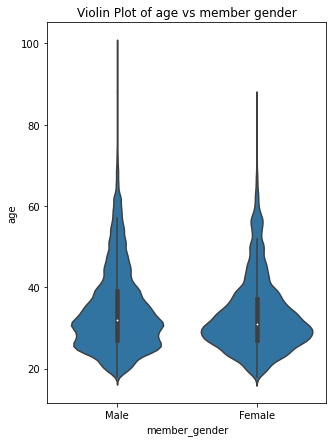

In [49]:
plt.figure(figsize=(5,7))
sb.violinplot(data=df, x='member_gender', y='age', color=base_color, innner=None);
plt.title('Violin Plot of age vs member gender');

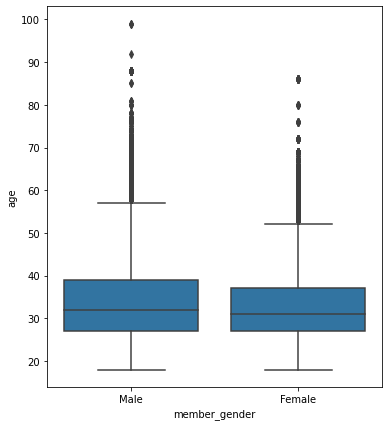

In [50]:
plt.figure(figsize=(6,7))
sb.boxplot(data=df, x='member_gender', y='age', color=base_color);

- It looks like females are overall younger than men with less variance in their age. This can partially explain how the variance in duration decreases with age, as females tend to have more average ride duration than men and they are less probable to be in higher ages.


- Next we will check the relation between gender and user_type.

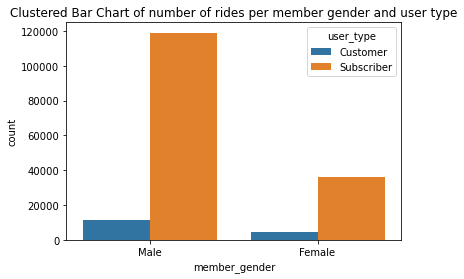

In [51]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type')
plt.title('Clustered Bar Chart of number of rides per member gender and user type');

- It seems the ratio between subscriber and customer does not depend on the gender.


- Next we will check the relation between the user type and subscription to bike_share_for_all_trip.

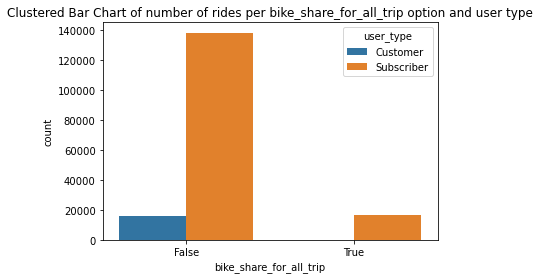

In [52]:
sb.countplot(data = df, x = 'bike_share_for_all_trip', hue = 'user_type')
plt.title('Clustered Bar Chart of number of rides per bike_share_for_all_trip option and user type');

- It looks like all participants in this option are only subscribers.


- Next, we will check the relation between the number of rides per weekday and gender.

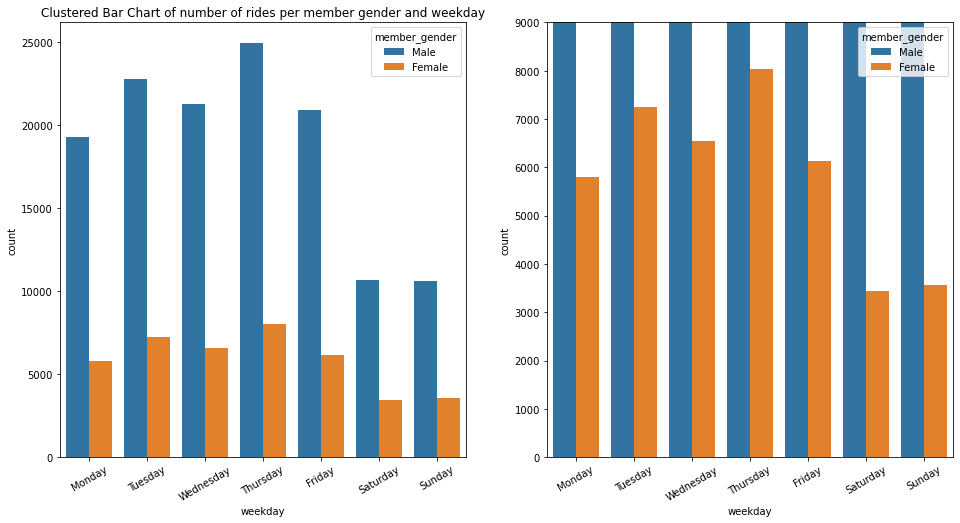

In [53]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Clustered Bar Chart of number of rides per member gender and weekday')
sb.countplot(data = df, x = 'weekday', hue = 'member_gender',order=order)
plt.xticks(rotation=30);
plt.subplot(1, 2, 2)
sb.countplot(data = df, x = 'weekday', hue = 'member_gender',order=order)
plt.xticks(rotation=30)
plt.ylim(0,9000);

- It seems there is the same ratio of rides between genders during all the days.


- Next we will check the relation between the number of rides per weekday and user type.

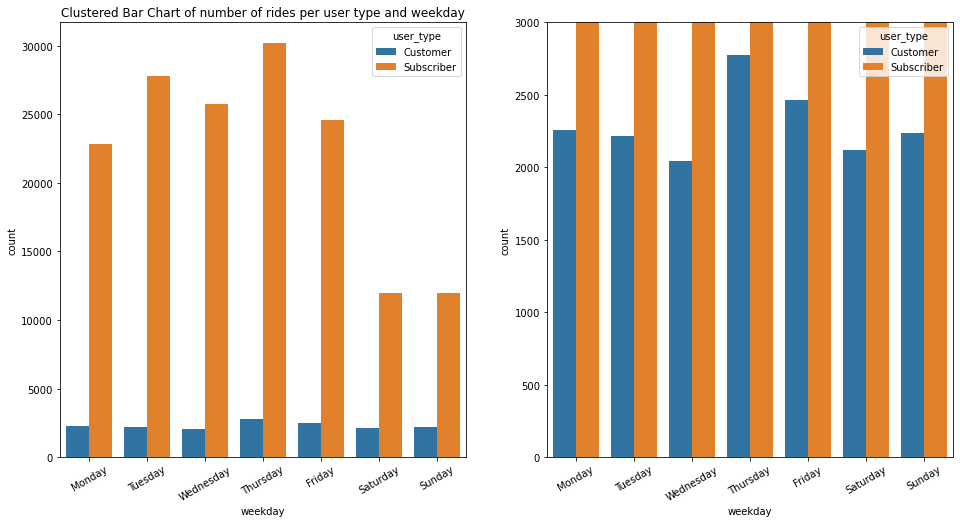

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'weekday', hue = 'user_type',order=order)
plt.title('Clustered Bar Chart of number of rides per user type and weekday')
plt.xticks(rotation=30);
plt.subplot(1, 2, 2)
sb.countplot(data = df, x = 'weekday', hue = 'user_type',order=order)
plt.xticks(rotation=30);
plt.ylim((0,3000));

- It seems that casual customers dont exhibit the same behavior as subscribers, where the number of rides during the weekend is similar to those during the weekdays. This strengths the suggestion we mentioned before that subscribers are mainly using the system to go to work while normal customers are using it for other purposes during all days.


- Next we will check the relation between number of rides per week day and subscription in bike_share_for_all_trip.

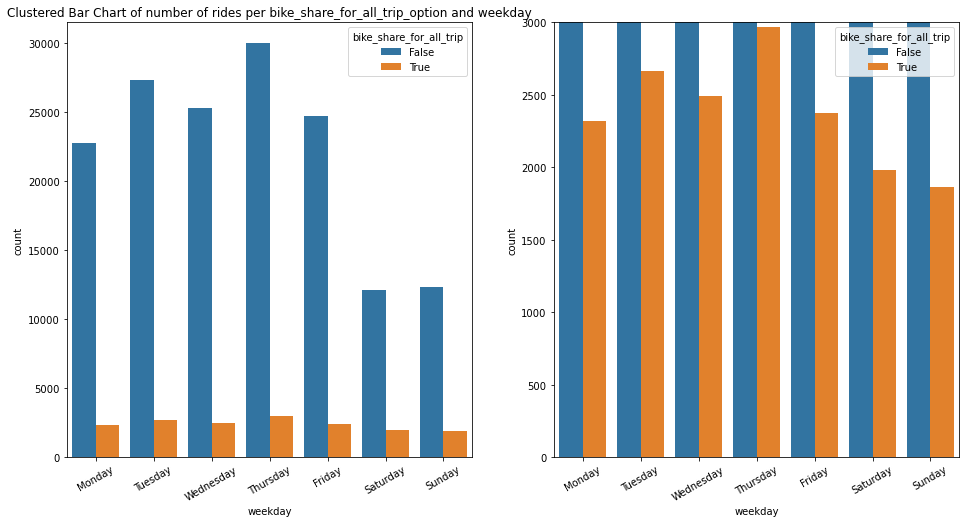

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Clustered Bar Chart of number of rides per bike_share_for_all_trip_option and weekday')
sb.countplot(data = df, x = 'weekday', hue = 'bike_share_for_all_trip',order=order)
plt.xticks(rotation=30);
plt.subplot(1, 2, 2)
sb.countplot(data = df, x = 'weekday', hue = 'bike_share_for_all_trip',order=order)
plt.xticks(rotation=30)
plt.ylim(0,3000);

- Similar to casual customers behaviour, it seems that subscribers to bike_share_for_all_trip have similar number of rides during the whole week, with a slight decrease during weekends.


- Next we will check the relation between user type and gender.

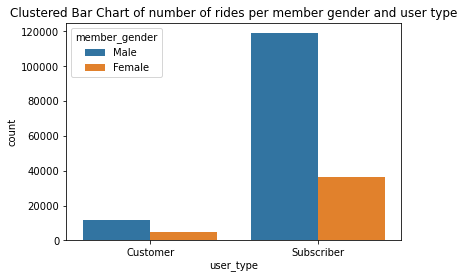

In [56]:
sb.countplot(data = df, x = 'user_type', hue = 'member_gender')
plt.title('Clustered Bar Chart of number of rides per member gender and user type');

- It seems that ratio of males to females does not depend on user type.


- Next, although we didnt investigate the different station locations during the univariate analysis, but it is more suitable to investigate longitude and latitude as a bivariate analysis from start.

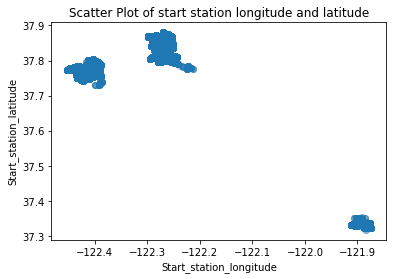

In [57]:
plt.scatter(data=df ,x='start_station_longitude', y='start_station_latitude',alpha=1/20)
plt.xlabel('Start_station_longitude')
plt.ylabel('Start_station_latitude')
plt.title('Scatter Plot of start station longitude and latitude');

- It appears that all stations are clustered around 3 locations, most probably most trips are local to each location, which can explain the relatively low average trip times.

#### **Summary:**

##### **Variation of the features of interest with other features in the dataset:**
> The ride duration exhibts more variance in the weekends and the variance tend to decrease with age. The average ride duration is less for subscribers than for casual customers. Also, subscribers to `bike_share_for_all_trip` have less average ride duration than non subscribers to this option. Females tend to have more average ride duration than men. During the day, the average ride duration decrease before and after the working hours.

> Although the number of rides generally decrease during weekends, but this is only valid for subscribers. While casual customers and subscribers to bike_share_for_all_trip option seem to have similar number of rides during the whole week.

##### **Realtionship between other features:**
> Females tend to be younger than men. Members of `bike_share_for_all_trip` option are only subcribers without any casual customer.

## **Multivariate Exploration**

We will check the relation between ride duration, age and gender.

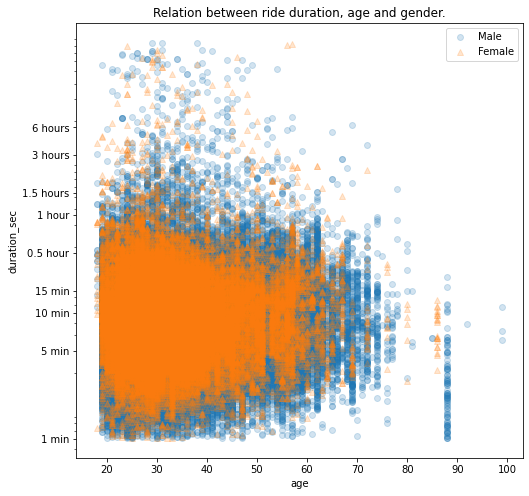

In [58]:
plt.figure(figsize=(8,8))
ttype_markers=[['Male','o'],['Female','^']]
plt.title('Relation between ride duration, age and gender.')
for ttype,marker in ttype_markers:
    plot_data=df.loc[df['member_gender']==ttype]
    sb.regplot(data=plot_data,x='age',y='duration_sec',fit_reg=False,marker=marker,scatter_kws={'alpha':1/5})
    plt.yscale('log')
    tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
    tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
    plt.yticks(tick_locs, tick_names)
plt.legend(['Male','Female']);

- We can clearly see less variance in the ride duration with age for females than for males.


- Next, we will check the relation between ride duration, age and user type.

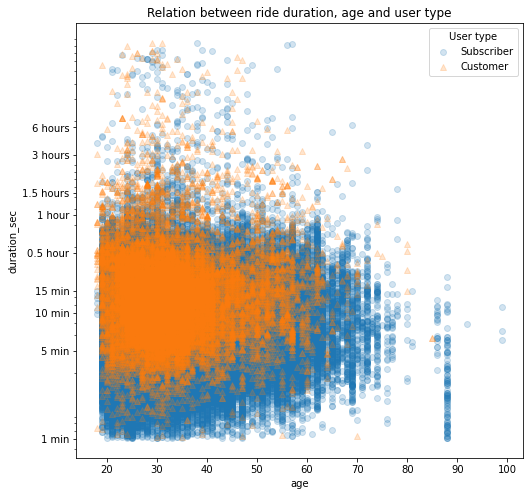

In [59]:
plt.figure(figsize=(8,8))
ttype_markers=[['Subscriber','o'],['Customer','^']]
plt.title('Relation between ride duration, age and user type')
for ttype,marker in ttype_markers:
    plot_data=df.loc[df['user_type']==ttype]
    sb.regplot(data=plot_data,x='age',y='duration_sec',fit_reg=False,marker=marker,scatter_kws={'alpha':1/5})
    plt.yscale('log')
    tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
    tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
    plt.yticks(tick_locs, tick_names)
plt.legend(['Subscriber','Customer'],title='User type');

- We can see that casual customers tend to have less variance in ride duration with age compared to subscribers and also more average ride duration.


- Next, we will check the relation between ride duration, gender and user type.

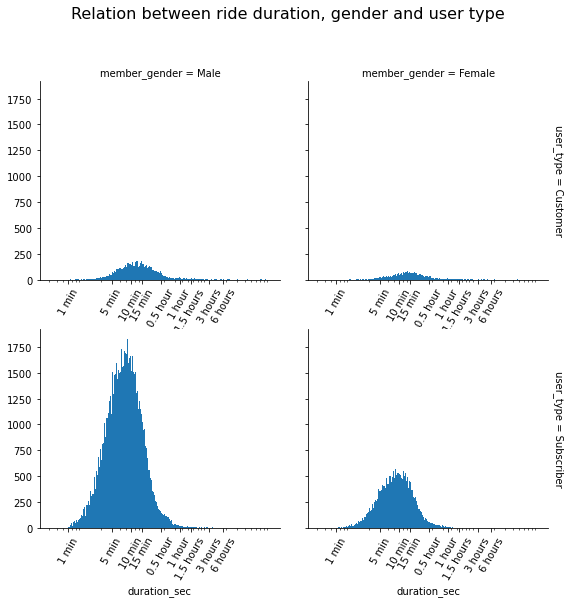

In [60]:
g=sb.FacetGrid(data=df,col='member_gender',row='user_type',margin_titles=True,height=4)
bins=10**np.arange(1.5,5,.01)
g.map(plt.hist,'duration_sec',bins=bins);
g.set(xscale = 'log') # need to set scaling before customizing ticks
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
g.set(xticks = tick_locs, xticklabels = tick_names)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
plt.subplots_adjust(hspace=0.25)
g.set_xticklabels(rotation=60)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Relation between ride duration, gender and user type',fontsize=16)
g.add_legend();

- Nothing new can be seen here, where casual customers have more average ride duration independent of gender. Next, we will check the relation between ride duration, user type and membership to `bike_share_for_all_trip`.

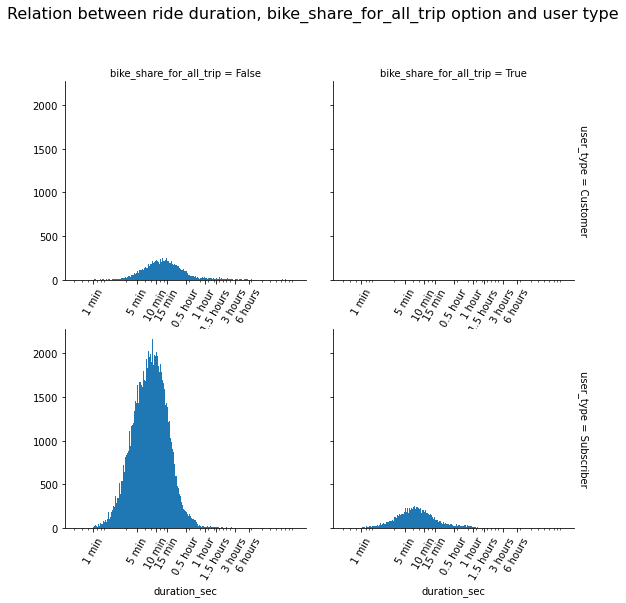

In [61]:
g=sb.FacetGrid(data=df,col='bike_share_for_all_trip',row='user_type',margin_titles=True,height=4)
bins=10**np.arange(1.5,5,.01)
g.map(plt.hist,'duration_sec',bins=bins);
g.set(xscale = 'log') # need to set scaling before customizing ticks
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
g.set(xticks = tick_locs, xticklabels = tick_names)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
plt.subplots_adjust(hspace=0.25)
g.set_xticklabels(rotation=60)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Relation between ride duration, bike_share_for_all_trip option and user type',fontsize=16)
g.add_legend();

- We can see in this one plot that average ride duration for casual customers is higher than normal susbcribers (which are not member to the `bike_share_for_all_trip` option) which themselves have higher average ride duration than subscribers to the `bike_share_for_all_trip` option. And that there are no casual customers who are member in this option.

#### **Summary:**

##### **Relationships observed in this part of the investigation:**
> There is less variance in the ride duration with age for females than for males. Also, the same behaviour happens with casual customers compared to subscribers.

>Average ride duration is highest for casual customers then subscribers who are not member of `bike_share_for_all_trip` then those who are member in this option.

##### **Were there any interesting or surprising interactions between features:**
> There are no extra interactions between features.